#### [ CNN Fashion MNIST MODEL]

[1] 모듈 로딩 및 데이터 준비<hr>

In [1]:
## 모듈 로딩
import torch                                        ## Tensor 및 기본 함수들 관련 모듈
import torch.nn as nn                               ## 인공신경망 관련 모듈
import torch.nn.functional as F                     ## 인공신경망 관련 함수들 모듈 

from torchvision.datasets import FashionMNIST       ## 비젼관련 내장 데이터셋 모듈
from torch.utils.data import DataLoader             ## Pytorch의 데이터셋 관련 모듈

import torchvision.transforms as transforms         ## 비젼관련 이미지 증강/변환 관련 모듈

import matplotlib.pyplot as plt                     ## 이미지 시각화 


In [3]:
## 이미지 관련 준비
IMG_ROOT = '../data/image/'                         ## 이미지 데이터 저장 폴더 경로

[2] 데이터 로딩 <hr>

In [4]:
trainDS=FashionMNIST(root=IMG_ROOT,
                     download=True,
                     train=True,
                     transform=transforms.ToTensor())

In [5]:
testDS=FashionMNIST(root=IMG_ROOT,
                     download=True,
                     train=False, 
                     transform=transforms.ToTensor())

In [6]:
## 데이터셋 체크
## - 타입
print(f'type         : {type(testDS)}\n')

## - 속성 : 클래스 정보
print(f'classes      : {testDS.classes}\n')
print(f'class_to_idx : {testDS.class_to_idx}\n')


type         : <class 'torchvision.datasets.mnist.FashionMNIST'>

classes      : ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

class_to_idx : {'T-shirt/top': 0, 'Trouser': 1, 'Pullover': 2, 'Dress': 3, 'Coat': 4, 'Sandal': 5, 'Shirt': 6, 'Sneaker': 7, 'Bag': 8, 'Ankle boot': 9}



In [7]:
## - 속성 : 데이터와 타겟
print(f'targets      : {testDS.targets}\n')
print(f'data         : {testDS.data.shape}\n')


targets      : tensor([9, 2, 1,  ..., 8, 1, 5])

data         : torch.Size([10000, 28, 28])



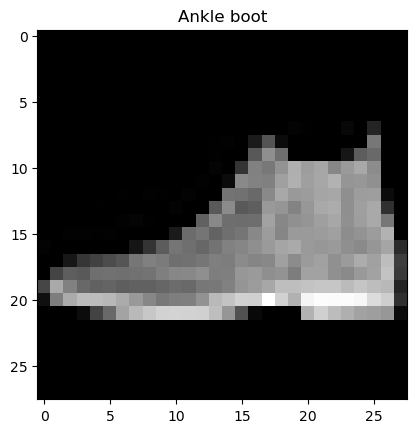

In [8]:
## 이미지 데이터와 타겟 확인
idx_to_classes ={v:k for k, v in testDS.class_to_idx.items()}

plt.imshow(testDS.data[0], cmap='gray')
plt.title(idx_to_classes[testDS.targets[0].item()])
plt.show()

In [9]:
## 로우 데이터 확인
print(f'Raw Image Data : {testDS.data[0].min()}, {testDS.data[0].max()}')

Raw Image Data : 0, 255


[3] 모델 정의 및 설계 <hr>

In [10]:
## DNN MODEL -----------------------------------------------------------------------
## 클래스이름 : FashionDNN
## 부모클래스 : nn.Module
## 모델구현법 : 지도학습 + 다중 분류 
## 모델층 구성  입력피쳐/신호     출력/퍼셉트론수    활성화함수
## 입  력  층       784             512             ReLu
## 은  닉  층       512             256             ReLu
## 은  닉  층       256             130             ReLu
## 출  력  층       130             10               X
## ----------------------------------84----------------------------------------------
class FashionDNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.in_layer   = nn.Flatten()
        self.hd_layer1  = nn.Linear(784, 512)
        self.drop_layer = nn.Dropout(0.25)
        self.hd_layer2  = nn.Linear(512, 256)
        self.hd_layer3  = nn.Linear(256, 130)
        self.out_layer  = nn.Linear(130, 10)
        
    ## 순방향 학습 진행 메서드 
    def forward(self, data):
        ## 3D (BS, H, W) ==> 2D (BS, H*W)
        print(f'data shape : {data.shape}')
        out = self.in_layer(data)
        print(f'out shape : {out.shape}')

        out =F.relu(self.hd_layer1(out))
        out = self.drop_layer(out)

        out =F.relu(self.hd_layer2(out))
        out = self.drop_layer(out)

        out =F.relu(self.hd_layer3(out))
        out = self.out_layer(out)
        
        print(f'out shape : {out.shape}')
        return out

In [11]:
## 모델 구조 확인 
from torchinfo import summary 

m1 = FashionDNN()
summary(m1, input_size=(100, 28, 28))

data shape : torch.Size([100, 28, 28])
out shape : torch.Size([100, 784])
out shape : torch.Size([100, 10])


Layer (type:depth-idx)                   Output Shape              Param #
FashionDNN                               [100, 10]                 --
├─Flatten: 1-1                           [100, 784]                --
├─Linear: 1-2                            [100, 512]                401,920
├─Dropout: 1-3                           [100, 512]                --
├─Linear: 1-4                            [100, 256]                131,328
├─Dropout: 1-5                           [100, 256]                --
├─Linear: 1-6                            [100, 130]                33,410
├─Linear: 1-7                            [100, 10]                 1,310
Total params: 567,968
Trainable params: 567,968
Non-trainable params: 0
Total mult-adds (M): 56.80
Input size (MB): 0.31
Forward/backward pass size (MB): 0.73
Params size (MB): 2.27
Estimated Total Size (MB): 3.31

In [12]:
## DNN모델에 이미지 테스트
testImg = trainDS.data[0:2].float()
pre=m1(testImg)
pre, trainDS.targets[0:2]

data shape : torch.Size([2, 28, 28])
out shape : torch.Size([2, 784])
out shape : torch.Size([2, 10])


(tensor([[ -7.4425,   6.9412,  -4.5538,  -8.2950, -13.4516,  -2.1559,   9.8656,
           -3.6305,  -5.0619, -12.4136],
         [ -9.9866,  11.5438,   2.4364,  -7.1637,  -7.3627,  -3.1741,  12.7201,
           -1.9780,   2.3185,  -9.6685]], grad_fn=<AddmmBackward0>),
 tensor([9, 0]))

In [13]:
## CNN MODEL -----------------------------------------------------------------------
## 클래스이름 : FashionCNN
## 부모클래스 : nn.Module
## 모델구현법 : 지도학습 + 다중 분류 
## 모델층 구성  
## 특징  추출  입력 이미지 주요 특징 추출한 특징맵 FeatureMap
## 합성 곱 층  이미지채널/커널수    출력채널/커널수   커널크기  패딩크기   스트라이드  
##                 1                1              3        0          1 
## 풀  링  층  커널크기,   스트라이드
##                2          2
## 플  랫  층   --    
##
## 전결합학습  추출된 FeatureMap으로 학습 진행
## 은  닉  층  커널수*높이*너비     출력/퍼셉트론수 
##                                   30
## 은  닉  층        30               15
## 출  력  층        15               10
## --------------------------------------------------------------------------------
class FashionCNN0(nn.Module):
    def __init__(self):
        super().__init__()
        ## 특징맵 추출 부분
        self.con_layer1 = nn.Conv2d(1, 1, 3)     ## (1, 1, 28, 28 )  ==> (1,  1, 26, 26)
        self.pool_layer1= nn.MaxPool2d(2, 2)     ## (1, 1, 26, 26 )  ==> (1,  1, 13, 13)
        self.flat_layer = nn.Flatten()           ## (1, 1, 13, 13)   ==> (1,  1*13*13)

        ## 전결합 학습 부분
        self.fc_layer  = nn.Linear(169, 30)     
        self.out_layer = nn.Linear(30, 10)


    def forward(self, data):
        print(f'IN data shape     : {data.shape}')
        out = F.relu(self.con_layer1(data))
        print(f'con_layer1 shape  : {out.shape}')
        out = self.pool_layer1(out)
        print(f'pool_layer1 shape : {out.shape}')

        out = self.flat_layer(out)
        print(f'flatten_layer shape : {out.shape}')
        
        out =F.relu(self.fc_layer(out))
        out = self.out_layer(out)
        print(f'out_layer shape : {out.shape}')
        return out

In [14]:
## 모델 설계 및 정의 체크 
m1 = FashionCNN0()
summary(m1, input_size=(1, 28, 28))

IN data shape     : torch.Size([1, 28, 28])
con_layer1 shape  : torch.Size([1, 26, 26])
pool_layer1 shape : torch.Size([1, 13, 13])
flatten_layer shape : torch.Size([1, 169])
out_layer shape : torch.Size([1, 10])


Layer (type:depth-idx)                   Output Shape              Param #
FashionCNN0                              [1, 10]                   --
├─Conv2d: 1-1                            [1, 26, 26]               10
├─MaxPool2d: 1-2                         [1, 13, 13]               --
├─Flatten: 1-3                           [1, 169]                  --
├─Linear: 1-4                            [1, 30]                   5,100
├─Linear: 1-5                            [1, 10]                   310
Total params: 5,420
Trainable params: 5,420
Non-trainable params: 0
Total mult-adds (M): 0.01
Input size (MB): 0.00
Forward/backward pass size (MB): 0.01
Params size (MB): 0.02
Estimated Total Size (MB): 0.03

In [ ]:
## CNN MODEL -----------------------------------------------------------------------
## 클래스이름 : FashionCNN
## 부모클래스 : nn.Module
## 모델구현법 : 지도학습 + 다중 분류 
## 모델층 구성  입력피쳐/신호     출력/퍼셉트론수    활성화함수
## 입  력  층       784             512             ReLu
## 은  닉  층       512             256             ReLu
## 은  닉  층       256             130             ReLu
## 출  력  층       130             10               X
## --------------------------------------------------------------------------------
class FashionCNN1(nn.Module):
    def __init__(self):
        super().__init__()
        self.con_layer1     = nn.Conv2d(1, 1, 3, padding=1)
        self.pool_layer1    = nn.MaxPool2d(2)
        self.con_layer2     = nn.Conv2d(1, 1, 3)
        self.pool_layer2    = nn.MaxPool2d(2)
        self.flatten_layer  = nn.Flatten()
        self.fc_layer       = nn.Linear(1*6*6, 30)
        self.out_layer      = nn.Linear(30, 10)
        

    def forward(self, data):
        print(f'data shape : {data.shape}')

        out = F.relu(self.con_layer1(data))
        print(f'1. out shape : {out.shape}')
        out = self.pool_layer1(out)
        print(f'1-1. out shape : {out.shape}')
        
        out = F.relu(self.con_layer2(out))
        print(f'2. out shape : {out.shape}')
        out = self.pool_layer2(out)
        print(f'2-1. out shape : {out.shape}')

        out = self.flatten_layer(out)
        print(f'3. out shape : {out.shape}')
        
        out =F.relu(self.fc_layer(out))
        out = self.out_layer(out)
        print(f'out shape : {out.shape}')
        return out


In [16]:
## 모델 설계 및 정의 체크 
m1 = FashionCNN1()
summary(m1, input_size=(1, 28, 28))

data shape : torch.Size([1, 28, 28])
1. out shape : torch.Size([1, 28, 28])
1-1. out shape : torch.Size([1, 14, 14])
2. out shape : torch.Size([1, 12, 12])
2-1. out shape : torch.Size([1, 6, 6])
3. out shape : torch.Size([1, 36])
out shape : torch.Size([1, 10])


Layer (type:depth-idx)                   Output Shape              Param #
FashionCNN1                              [1, 10]                   --
├─Conv2d: 1-1                            [1, 28, 28]               10
├─MaxPool2d: 1-2                         [1, 14, 14]               --
├─Conv2d: 1-3                            [1, 12, 12]               10
├─MaxPool2d: 1-4                         [1, 6, 6]                 --
├─Flatten: 1-5                           [1, 36]                   --
├─Linear: 1-6                            [1, 30]                   1,110
├─Linear: 1-7                            [1, 10]                   310
Total params: 1,440
Trainable params: 1,440
Non-trainable params: 0
Total mult-adds (M): 0.00
Input size (MB): 0.00
Forward/backward pass size (MB): 0.01
Params size (MB): 0.01
Estimated Total Size (MB): 0.02

In [17]:
## 모델 이미지 적용 후 체크
for img, target in testDS:
    print(img.shape, target)
    pre = m1(img)
    print(pre, target)
    break

torch.Size([1, 28, 28]) 9
data shape : torch.Size([1, 28, 28])
1. out shape : torch.Size([1, 28, 28])
1-1. out shape : torch.Size([1, 14, 14])
2. out shape : torch.Size([1, 12, 12])
2-1. out shape : torch.Size([1, 6, 6])
3. out shape : torch.Size([1, 36])
out shape : torch.Size([1, 10])
tensor([[-0.1069,  0.1041,  0.0891, -0.0071,  0.0448, -0.1591, -0.1054, -0.0290,
          0.0695, -0.1345]], grad_fn=<AddmmBackward0>) 9
